In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df = pd.DataFrame(data=iris.data, columns = iris.feature_names)

In [5]:
df['target'] = iris.target

In [6]:
df['flower_names'] = df.target.apply(lambda x: iris.target_names[x])
#this will create a new colmn. 'flower_names' and put name in it from the iris.target array

In [7]:
df0 = df[df.target==0]

In [8]:
df1 = df[df.target==1]
df2 = df[df.target==2]

Text(0, 0.5, 'Sepal Width')

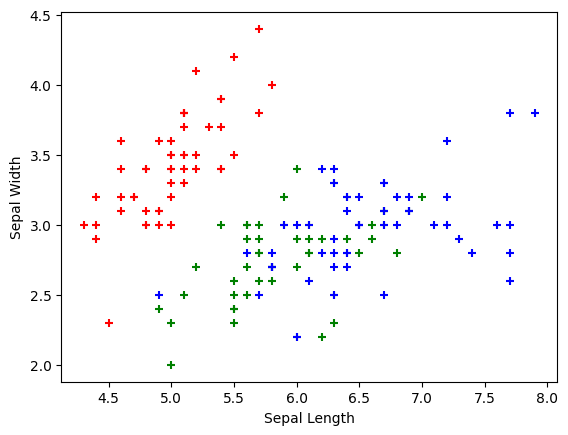

In [9]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='red',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green',marker='+')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='blue',marker='+')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

Text(0, 0.5, 'petal Width')

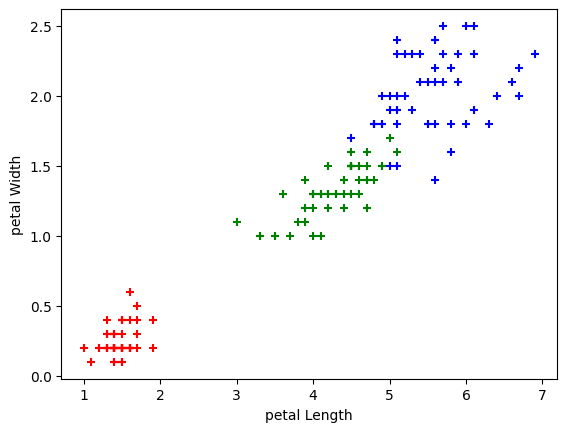

In [10]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='red',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green',marker='+')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='blue',marker='+')
plt.xlabel("petal Length")
plt.ylabel("petal Width")

In [11]:
from sklearn.model_selection import train_test_split


In [13]:
x = df.drop(['target','flower_names'],axis=1)

In [14]:
y=df.target

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=3)

In [19]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
knn.score(x_test,y_test)

0.9666666666666667

In [28]:
ypred = knn.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(TRUTH,PREDICTION)
cm = confusion_matrix(y_test,ypred)

In [30]:
cm

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]], dtype=int64)

In [31]:
import seaborn as sns


Text(50.722222222222214, 0.5, 'Truth')

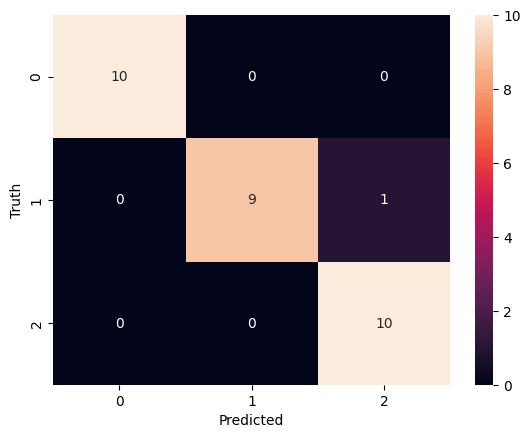

In [34]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

